# Audio density

### Importing all libraries

In [ ]:
from google.colab import drive
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle

### Connecting to Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Loading datasets

In [ ]:
X_train = np.load('/content/drive/MyDrive/ml_dl/audio-2/training_set/X_train.npy')
y_train = np.load('/content/drive/MyDrive/ml_dl/audio-2/training_set/y_train.npy')

X_validation = np.load('/content/drive/MyDrive/ml_dl/audio-2/validation_set/X_validation.npy')
y_validation = np.load('/content/drive/MyDrive/ml_dl/audio-2/validation_set/y_validation.npy')

X_test = np.load('/content/drive/MyDrive/ml_dl/audio-2/test_set/X_test.npy')
y_test = np.load('/content/drive/MyDrive/ml_dl/audio-2/test_set/y_test.npy')

X = np.load('/content/drive/MyDrive/ml_dl/audio-2/dataset/X.npy')
y = np.load('/content/drive/MyDrive/ml_dl/audio-2/dataset/y.npy')

### Gaussian NB training and performance

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_validation)
accuracy_gnb = metrics.accuracy_score(y_validation, y_pred)
print("Accuracy:", accuracy_gnb)

Accuracy: 0.8055555555555556


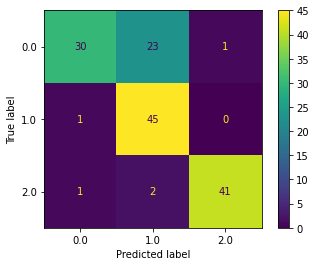

In [ ]:
cm = confusion_matrix(y_validation, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gnb.classes_)
disp.plot()
plt.show()

### KNN training and performance

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
y_pred = knn.predict(X_validation)
accuracy_knn =  metrics.accuracy_score(y_validation, y_pred)
print("Accuracy:", accuracy_knn)

Accuracy: 0.7916666666666666


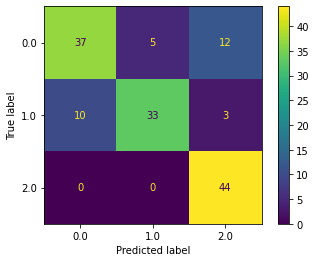

In [ ]:
cm = confusion_matrix(y_validation, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

### KNN hyperparameter tuning
number of neighbors (***n_neighbors***) in  [1, 10]

In [ ]:
acc = []

for i in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_validation)
  a = metrics.accuracy_score(y_validation, y_pred)
  acc.append(a)

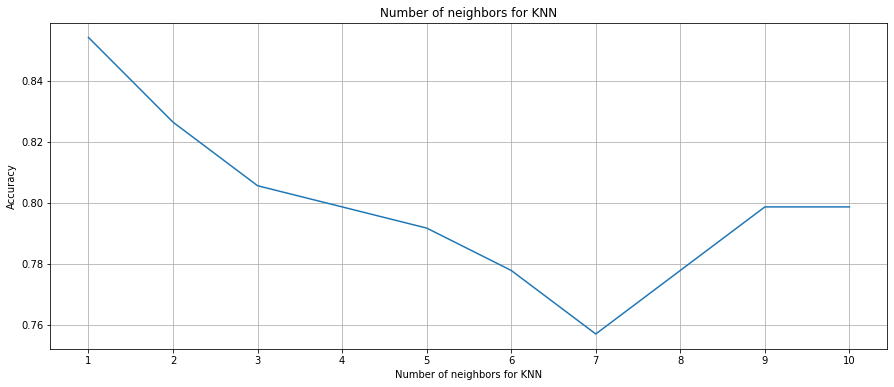

In [ ]:
number_of_neigh = [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(15, 6))
plt.plot(number_of_neigh, acc)
plt.title("Number of neighbors for KNN")
plt.xlabel("Number of neighbors for KNN")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(number_of_neigh)
plt.show()

### Testing on test set

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy_knn =  metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

Accuracy: 0.845360824742268


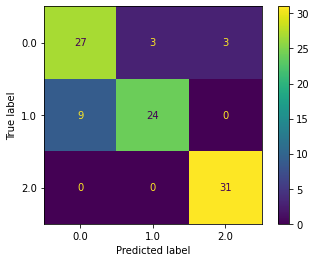

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

### 10-fold Cross Validation

In [ ]:
scores = cross_val_score(knn, X = X, y = y, cv=10, n_jobs=-1)
accuracy_CV10 = np.mean(scores)
print('Cross Validation accuracy: ' + str(accuracy_CV10))

Cross Validation accuracy: 0.833879781420765


### Saving the best model

In [ ]:
model_path = "/content/drive/MyDrive/ml_dl/audio-2/models/audio_knn.pkl"

# save
with open(model_path,'wb') as f:
    pickle.dump(knn,f)

# load
with open(model_path, 'rb') as f:
    knn = pickle.load(f)